# Feature Selection

The classes in the [sklearn.feature_selection](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) module can be used for feature selection/dimensionality reduction on sample sets. The functions used here are listed below with their documentations:

- [VarianceThreshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)
- [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
- [chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)
- [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
- [RFECV](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)
- [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)

## Zero Variance

`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold.

In [2]:
from sklearn import feature_selection, datasets, svm, ensemble
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [3]:
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = feature_selection.VarianceThreshold(threshold = 0) # default is 0
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

The first and the last feature are removed becuase they contained the same value for all the observation and thus had zero variance.

## Univariate feature selection

Select the best features based on univariate statistical tests. For example, we can perform a $\chi^2$ test to the samples to retrieve only the two best features as follows:

In [4]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)
X_new = feature_selection.SelectKBest(feature_selection.chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 4)


(150, 2)

## Recursive Feature Elimination

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Check out this [Example](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py). The number of featres to keep can either be provided to [RFE](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). They can also be computed using cross-validation, [RFECV](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

Optimal number of features : 3


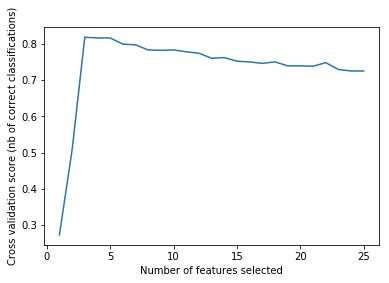

In [5]:
# Build a classification task using 3 informative features
X, y = datasets.make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = feature_selection.RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Feature selection using `SelectFromModel`

`SelectFromModel` is a meta-transformer that can be used along with any estimator that has a `coef_` or `feature_importances_` attribute after fitting. The features are considered unimportant and removed, if the corresponding `coef_` or `feature_importances_` values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

[This example](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_boston.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-boston-py) demonstrates how to select the two most important features from the Boston dataset without knowing the threshold beforehand.

#### Using SVM to remove features
We can also use models like lasso or support vector classifiers to eliminate features having zero coefficients since these models set certain features to zero as the cost of regularization is increased.

In [6]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
print(X.shape)
lsvc = svm.LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = feature_selection.SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


#### Using trees to remove features

We can use a similar approach as above, but this time using the extra tree classifier to remove features.

In [7]:
print(X.shape)
clf = ensemble.ExtraTreesClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)
model = feature_selection.SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
[ 0.10811386  0.04727881  0.37523415  0.46937318]
(150, 2)


Check out [this example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py).